#Daffa Rizki Rizaly - 2301931251


In [ ]:
!pip install --upgrade tensorflow==1.15

Requirement already up-to-date: tensorflow==1.15 in /usr/local/lib/python3.7/dist-packages (1.15.0)


In [ ]:
#Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd

In [ ]:
#Import Dataset
from sklearn.datasets import load_digits
digits=load_digits()

#Preprocessing

In [ ]:
#Define variables
n_samples=len(digits.images)
print("Number of samples in the data set is :"+ str(n_samples))

x=digits.images.reshape((n_samples,-1)) # Reshaping the vector into the number of samples
print("Shape of input matrix x is : "+str(x.shape))

#Declaring y as the targets
y=digits.target

Number of samples in the data set is :1797
Shape of input matrix x is : (1797, 64)


In [ ]:
#Split dataset for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Making the model

In [ ]:
#Using MLPCLassifier model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state = 1,max_iter=400).fit(x_train,y_train)
predict = clf.predict(x_test)

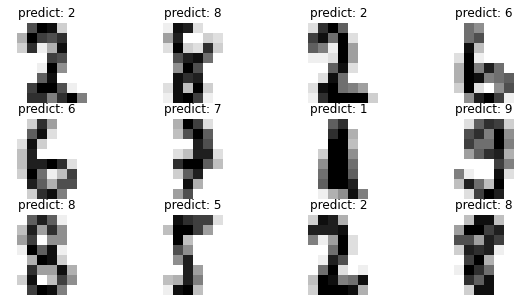

In [ ]:
_, axes =plt.subplots(3, 4, figsize=(10,5))
for ax, image, pred in zip(axes.flat, x_test, predict):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'predict: {pred}')

As we can see from the above, we have already predict correctly

#Evaluation

In [ ]:
#Evaluate using metric.classification report
evaluation = metrics.classification_report(y_test,predict)
print(evaluation)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      0.97      0.94        35
           2       1.00      0.97      0.99        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       1.00      0.97      0.99        40
           6       1.00      0.98      0.99        44
           7       0.95      1.00      0.97        39
           8       0.97      0.92      0.95        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



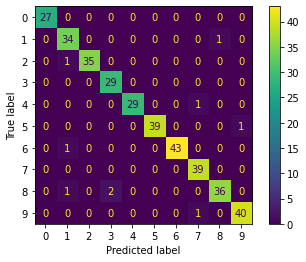

In [ ]:
#Confusion Matrix using metrics
conf = metrics.plot_confusion_matrix(clf,x_test,y_test)

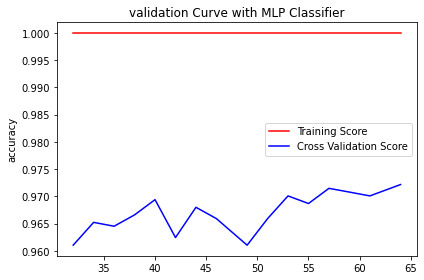

In [26]:
#Creating the validation curve

from sklearn.model_selection import validation_curve
range_graph = np.linspace(64, 32, 16, dtype=int)

#Using the validation curve to output the train and test
train, test = validation_curve(estimator=MLPClassifier(hidden_layer_sizes=(64, 32, 16),
    max_iter=1000, random_state=-0, validation_fraction=0.5), X=x_train, y=y_train, param_range=range_graph, param_name="hidden_layer_sizes")

mean_tr = np.mean(train, axis=1)
std_tr = np.std(train, axis=1)
mean_ts = np.mean(test, axis=1)
std_ts = np.std(test, axis=1)


plt.plot(range_graph, mean_tr, label="Training Score", color = 'r')
plt.plot(range_graph, mean_ts, label="Cross Validation Score", color = 'b')

plt.title("validation Curve with MLP Classifier")
plt.ylabel("accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()